In [1]:
#Tasks - Module 4 -- Time Series Analysis

#Loading necessary packages

import pandas as pd
import numpy as np
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pandas import Series
import statsmodels as sm
import statsmodels.api as sm
from scipy import stats
from matplotlib.dates import DateFormatter
import scipy.stats as scp



In [2]:
#Task 1

#Reading in the necessary data
data_cash = pd.read_csv("data.cash.csv", header=None)

#Renaming the columns
data_cash.columns = ['Year','Cash']

data_cash['Year'] = pd.to_datetime(data_cash['Year'], format='%Y')

data_cash.head()


,Year,Cash
0,1994-01-01,3664.750000
1,1995-01-01,3920.500000
2,1996-01-01,4259.500000
3,1997-01-01,4933.333333
4,1998-01-01,5530.000000


In [3]:
#Setting the index of the dataframe to the Year column

data_cash.set_index('Year', inplace=True)
#There is no need to convert the column to ts object as in R

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Cash values of withdrawals'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Yearly average of ATM Cash Withdrawals from 1994 to 2016')]

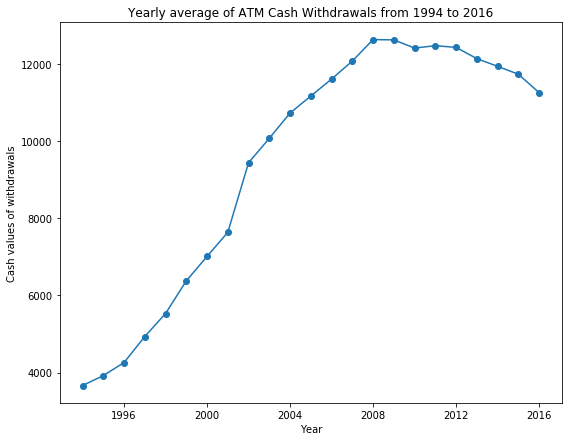

In [4]:
#Plotting the data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_cash.index.values, data_cash['Cash'],'-o')
ax.set(xlabel="Year",ylabel="Cash values of withdrawals",title="Yearly average of ATM Cash Withdrawals from 1994 to 2016")


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


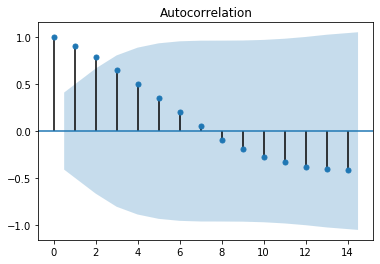

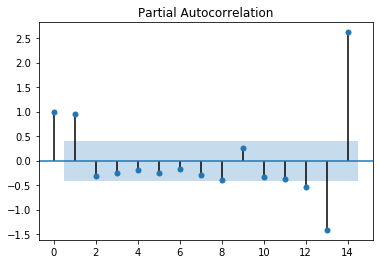

In [5]:
#Creating the ACF and PACF plots

sm.graphics.tsa.plot_acf(data_cash.Cash);
sm.graphics.tsa.plot_pacf(data_cash.Cash);

In [6]:
#Transforming the series

data_cash_transformed, lambda_= stats.boxcox(data_cash.Cash) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

data_cash_transformed = pd.DataFrame(data_cash_transformed)

#Setting the index of the data frame
data_cash_transformed.index=data_cash.index

data_cash_transformed.columns = ['Cash']

data_cash_transformed.head()

#The lambda value here is different from the lambda value from R

lambda= 1.948708349735878


,Cash
Year,
1994-01-01,4.524141e+06
1995-01-01,5.159738e+06
1996-01-01,6.064773e+06
1997-01-01,8.074335e+06
1998-01-01,1.008632e+07


In [7]:
#Taking the first difference of the series

data_cash_differenced = Series.diff(data_cash_transformed, 1)

data_cash_differenced.columns = ['Cash']

data_cash_differenced.head()


,Cash
Year,
1994-01-01,NaN
1995-01-01,6.355970e+05
1996-01-01,9.050357e+05
1997-01-01,2.009562e+06
1998-01-01,2.011987e+06


[Text(0, 0.5, 'Transformed and differenced cash values of withdrawals'),
 Text(0.5, 0, 'Year')]

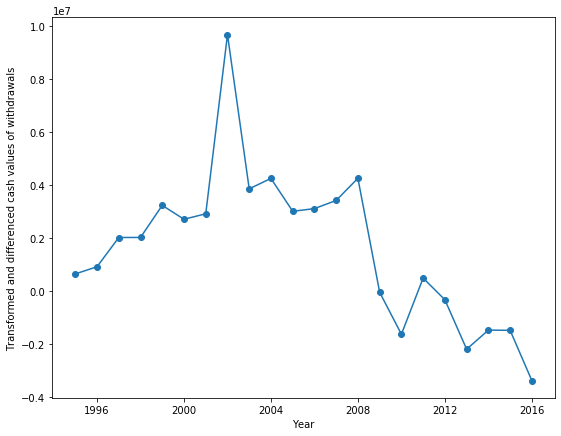

In [8]:
#Plotting the differenced data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_cash_differenced.index.values, data_cash_differenced,'-o')
ax.set(xlabel="Year",ylabel="Transformed and differenced cash values of withdrawals")

In [9]:
#Removing the first NA value for use with ACF and PACF plots

data_cash_differenced_clean = data_cash_differenced.iloc[1:]

data_cash_differenced_clean.head()

,Cash
Year,
1995-01-01,6.355970e+05
1996-01-01,9.050357e+05
1997-01-01,2.009562e+06
1998-01-01,2.011987e+06
1999-01-01,3.222906e+06


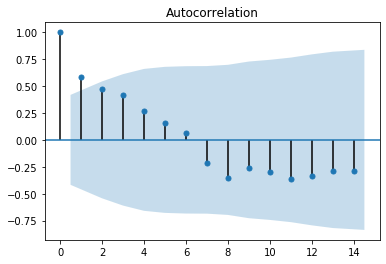

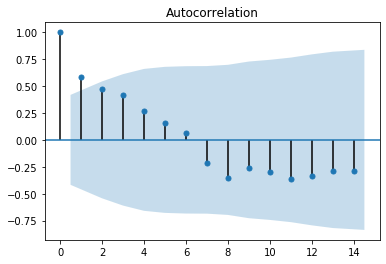

In [10]:
#Creating the ACF and PACF plots

sm.graphics.tsa.plot_acf(data_cash_differenced_clean.Cash);
sm.graphics.tsa.plot_acf(data_cash_differenced_clean.Cash);

In [11]:
#Taking the second difference of the series

data_cash_2differenced = Series.diff(data_cash_transformed, 2)

data_cash_2differenced.columns = ['Cash']

data_cash_2differenced.head()

,Cash
Year,
1994-01-01,NaN
1995-01-01,NaN
1996-01-01,1.540633e+06
1997-01-01,2.914598e+06
1998-01-01,4.021549e+06


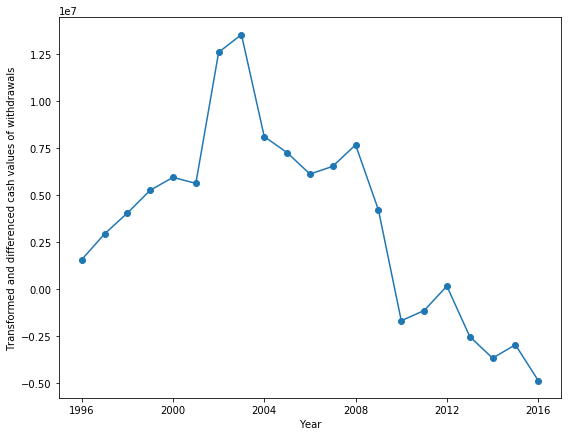

In [12]:
#Plotting the differenced data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_cash_2differenced.index.values, data_cash_2differenced,'-o')
ax.set(xlabel="Year",ylabel="Transformed and differenced cash values of withdrawals")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

In [13]:
#Removing the first two NA values for use with ACF and PACF plots

data_cash_2differenced_clean = data_cash_2differenced.iloc[2:]

data_cash_2differenced_clean.head()

,Cash
Year,
1996-01-01,1.540633e+06
1997-01-01,2.914598e+06
1998-01-01,4.021549e+06
1999-01-01,5.234893e+06
2000-01-01,5.920872e+06


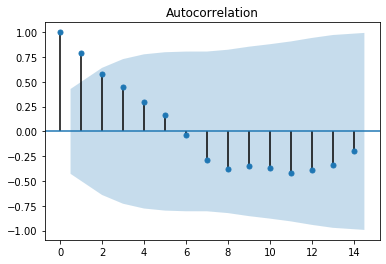

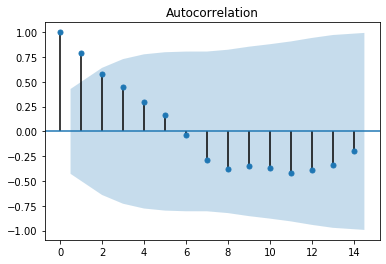

In [14]:
#Creating the ACF and PACF plots

sm.graphics.tsa.plot_acf(data_cash_2differenced_clean.Cash);
sm.graphics.tsa.plot_acf(data_cash_2differenced_clean.Cash);

In [15]:
#Task 2

#Reading in the necessary data file
airpass = pd.read_csv("airpass.csv", parse_dates=True, dayfirst=True) #Bringing in the Time column in %Y-%m-%d order

airpass.head()

,airpass,Time
0,112,1960-01-01
1,118,1960-02-01
2,132,1960-03-01
3,129,1960-04-01
4,121,1960-05-01


In [16]:
#Converting Time column to Datetime64 type
airpass['Time']=pd.to_datetime(airpass['Time'], format='%Y-%m-%d')

airpass.columns = ['Passengers', 'Time']
airpass.dtypes

Passengers             int64
Time          datetime64[ns]
dtype: object

In [17]:
#Setting the index of the dataframe to the Time column
airpass.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

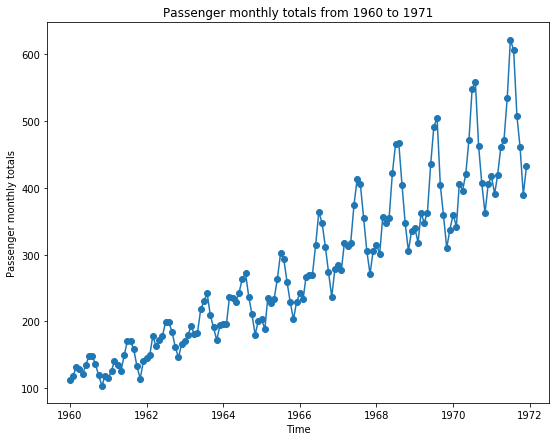

In [18]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(airpass.index.values, airpass['Passengers'],'-o')
ax.set(xlabel="Time",ylabel="Passenger monthly totals",title="Passenger monthly totals from 1960 to 1971")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

#There is no easy way to plot monthly symbols in python

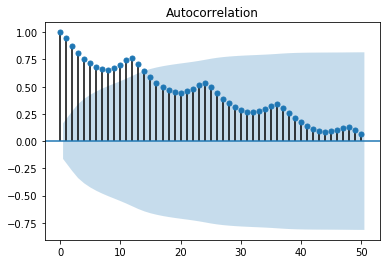

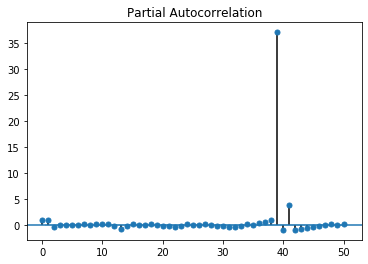

In [19]:
#Creating the ACF and PACF plots of the series

sm.graphics.tsa.plot_acf(airpass.Passengers, lags=50);
sm.graphics.tsa.plot_pacf(airpass.Passengers, lags=50);

In [20]:
#Taking log of the time series data

airpass['log_passengers'] = np.log(airpass['Passengers'])

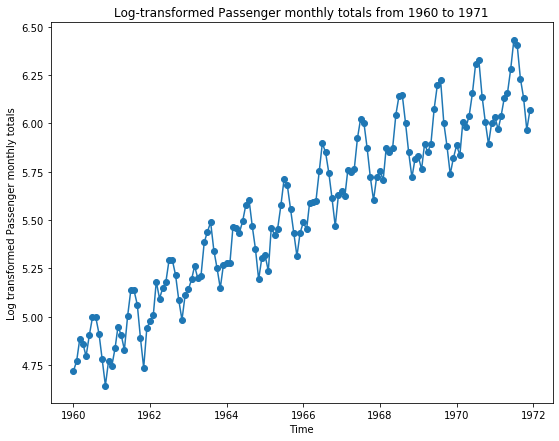

In [21]:
#Plotting the log transformed passenger totals as time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(airpass.index.values, airpass['log_passengers'],'-o')
ax.set(xlabel="Time",ylabel="Log transformed Passenger monthly totals",title="Log-transformed Passenger monthly totals from 1960 to 1971")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

In [22]:
#Taking the first difference of the log series

differenced_passengers = pd.DataFrame(Series.diff(airpass['log_passengers'], 1))

differenced_passengers.columns = ['Differenced_passengers']

differenced_passengers.head()

,Differenced_passengers
Time,
1960-01-01,NaN
1960-02-01,0.052186
1960-03-01,0.112117
1960-04-01,-0.022990
1960-05-01,-0.064022


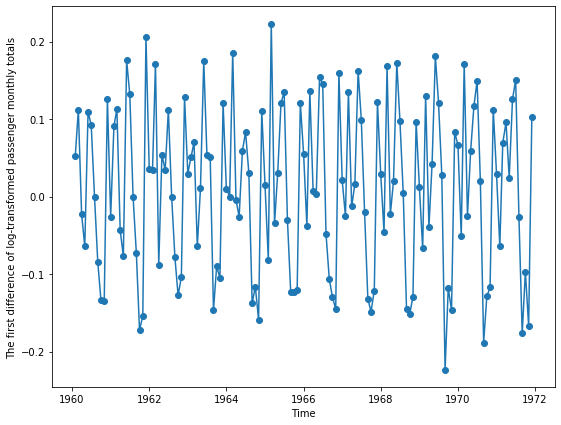

In [23]:
#Plotting the differenced passengers time series

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_passengers.index.values, differenced_passengers,'-o')
ax.set(xlabel="Time",ylabel="The first difference of log-transformed passenger monthly totals")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

In [24]:
#Removing the first NA value for use with ACF and PACF plots
differenced_passengers_clean = differenced_passengers.iloc[1:]

differenced_passengers_clean.head()

,Differenced_passengers
Time,
1960-02-01,0.052186
1960-03-01,0.112117
1960-04-01,-0.022990
1960-05-01,-0.064022
1960-06-01,0.109484


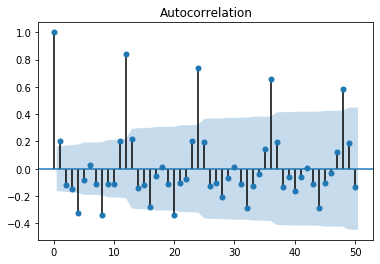

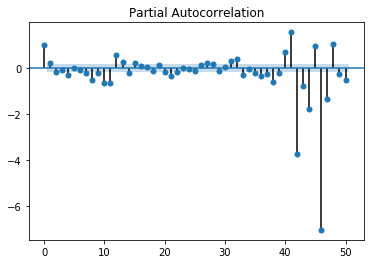

In [25]:
#Creating the ACF and PACF plots
sm.graphics.tsa.plot_acf(differenced_passengers_clean, lags=50);
sm.graphics.tsa.plot_pacf(differenced_passengers_clean, lags=50);

In [26]:
#Task 3

#Reading in the necessary data file
larain = pd.read_csv("larain.csv", parse_dates=True, dayfirst=True) #Bringing in the Time column in %Y-%m-%d order

larain.head()

,larain,Time
0,20.86,1878-01-01
1,17.41,1879-01-01
2,18.65,1880-01-01
3,5.53,1881-01-01
4,10.74,1882-01-01


In [27]:
#Converting Time column to Datetime64 type
larain['Time']=pd.to_datetime(larain['Time'], format='%Y-%m-%d')

larain.columns = ['Rain', 'Time']
larain.head()

,Rain,Time
0,20.86,1878-01-01
1,17.41,1879-01-01
2,18.65,1880-01-01
3,5.53,1881-01-01
4,10.74,1882-01-01


In [28]:
#Setting the index of the dataframe to the Time column
larain.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

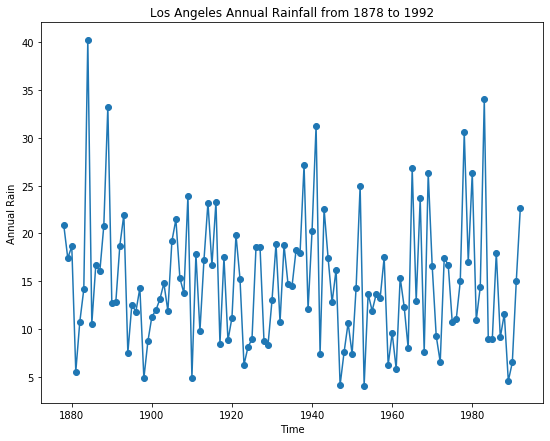

In [29]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(larain.index.values, larain['Rain'],'-o')
ax.set(xlabel="Time",ylabel="Annual Rain",title="Los Angeles Annual Rainfall from 1878 to 1992")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

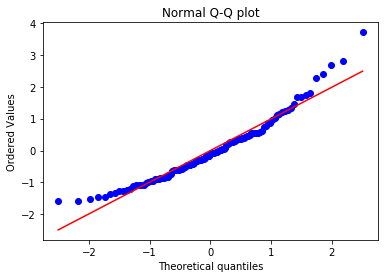

In [30]:
#Checking normality of larain series using QQ plot

z = (larain.Rain-np.mean(larain.Rain))/np.std(larain.Rain)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [31]:
#Shapiro-Wilk's test for normality

scp.shapiro(larain.Rain)

(0.9461705088615417, 0.00016140867955982685)

In [32]:
#Transforming the series

larain_transformed, lambda_= stats.boxcox(larain.Rain) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

larain_transformed = pd.DataFrame(larain_transformed)

#Setting the index of the data frame
larain_transformed.index=larain.index

larain_transformed.columns = ['Rain']

larain_transformed.head()

lambda= 0.2459413077379941


,Rain
Time,
1878-01-01,4.517054
1879-01-01,4.143782
1880-01-01,4.283883
1881-01-01,2.126051
1882-01-01,3.224116


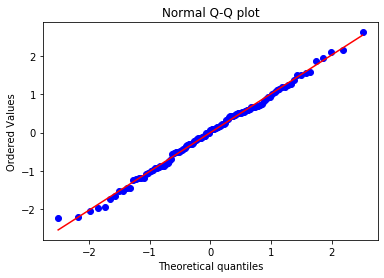

In [33]:
#Checking normality of Boxcox transformed larain series using QQ plot

z = (larain_transformed.Rain-np.mean(larain_transformed.Rain))/np.std(larain_transformed.Rain)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [34]:
#Shapiro-Wilk's test for normality

scp.shapiro(larain_transformed.Rain)

(0.9940663576126099, 0.908725917339325)

In [35]:
#As another transformation, log of the data is taken

larain['log_Rain'] = np.log(larain['Rain'])

larain.head()

,Rain,log_Rain
Time,,
1878-01-01,20.86,3.037833
1879-01-01,17.41,2.857045
1880-01-01,18.65,2.925846
1881-01-01,5.53,1.710188
1882-01-01,10.74,2.373975


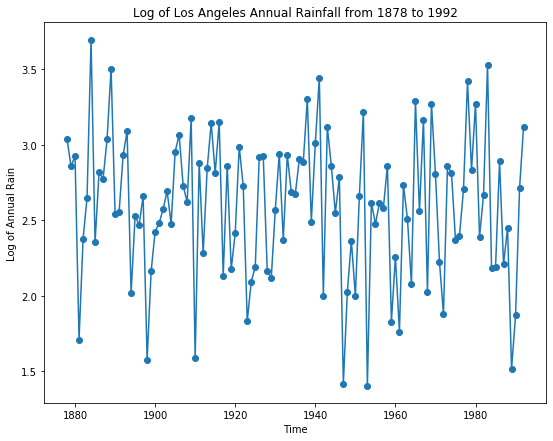

In [36]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(larain.index.values, larain['log_Rain'],'-o')
ax.set(xlabel="Time",ylabel="Log of Annual Rain",title="Log of Los Angeles Annual Rainfall from 1878 to 1992")

#Setting the ticks format on x-axis to months and years
ax.xaxis.set_major_formatter(DateFormatter("%Y"))

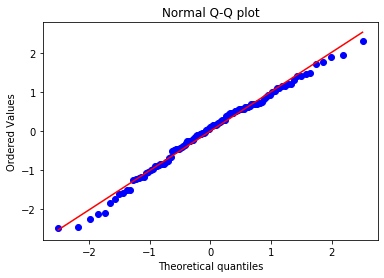

In [37]:
#Checking normality of log transformed larain series using QQ plot

z = (larain.log_Rain-np.mean(larain.log_Rain))/np.std(larain.log_Rain)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [38]:
#Shapiro-Wilk's test for normality

scp.shapiro(larain.log_Rain)

(0.987419843673706, 0.36435991525650024)

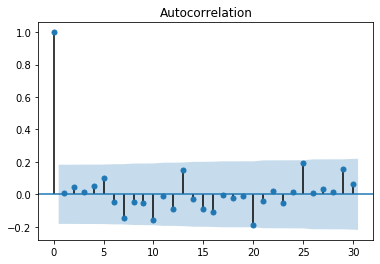

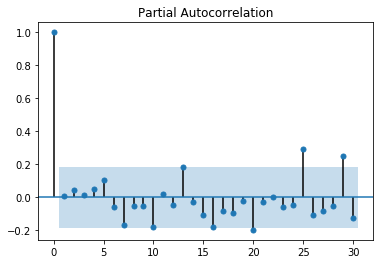

In [39]:
#Creating the ACF and PACF plots of the log of LA rain series
sm.graphics.tsa.plot_acf(larain.log_Rain, lags=30);
sm.graphics.tsa.plot_pacf(larain.log_Rain, lags=30);

In [40]:
#Task 4

#Reading in the necessary dataset
gold = pd.read_csv("gold.csv")

gold.columns = ["Price", "Time"]

gold.head()

,Price,Time
0,426.80,1
1,425.50,2
2,425.80,3
3,423.15,4
4,421.25,5


In [41]:
#Setting the index of the dataframe to the Time column

gold.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R

gold.head()

,Price
Time,
1,426.80
2,425.50
3,425.80
4,423.15
5,421.25


[Text(0, 0.5, 'Gold price'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Price of Gold for the 252 trading days of 2005')]

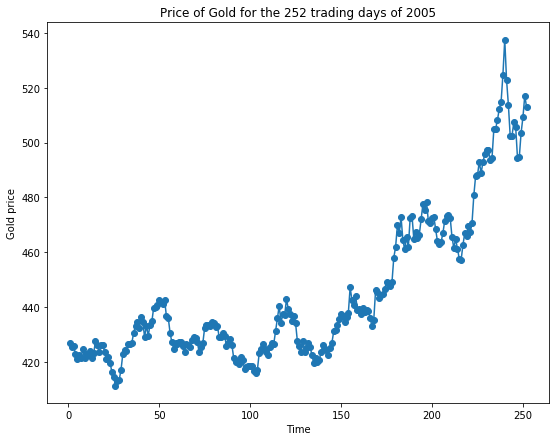

In [42]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(gold['Price'],'-o')
ax.set(xlabel="Time",ylabel="Gold price",title="Price of Gold for the 252 trading days of 2005")


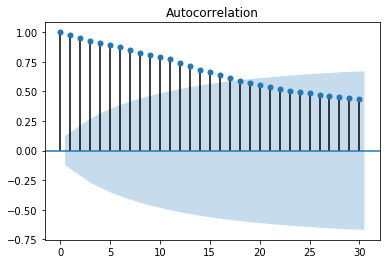

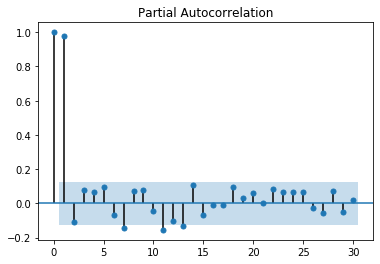

In [43]:
#Creating the ACF and PACF plots of the gold series

sm.graphics.tsa.plot_acf(gold.Price, lags=30);
sm.graphics.tsa.plot_pacf(gold.Price, lags=30);

In [44]:
#Transforming the series

#gold_transformed, lambda_= stats.boxcox(gold.Price) #Automatically transforms the data with the best lambda value

#print("lambda=",lambda_)

#gold_transformed = pd.DataFrame(gold_transformed)

#Setting the index of the data frame
#gold_transformed.index=gold.index

#gold_transformed.columns = ['Transformed Price']

#gold_transformed

#Attempting a transformation with stats.boxcox function has some issues related to Scipy package implementation of the Boxcox transformation
#as a result, all the transformed values are equal and prevents proceeding with the transformed series
#A fix is being looked at for this part - will be updated if found

#Proceeding without transformation due to this error

In [45]:
#Taking the first difference of the original series

differenced_gold = pd.DataFrame(Series.diff(gold['Price'], 1))

differenced_gold.columns = ['Differenced_gold']

differenced_gold.head()

,Differenced_gold
Time,
1,NaN
2,-1.30
3,0.30
4,-2.65
5,-1.90


[Text(0, 0.5, 'Differenced Gold price'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Differenced Price of Gold for the 252 trading days of 2005')]

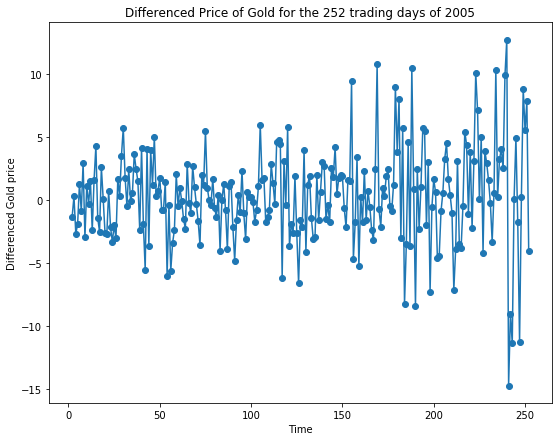

In [46]:
#Plotting the differenced time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_gold['Differenced_gold'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Gold price",title="Differenced Price of Gold for the 252 trading days of 2005")



In [47]:
#Removing the first NA value for use with ACF and PACF plots
differenced_gold_clean = differenced_gold.iloc[1:]

differenced_gold_clean.head()

,Differenced_gold
Time,
2,-1.30
3,0.30
4,-2.65
5,-1.90
6,1.30


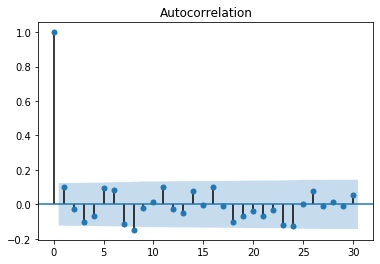

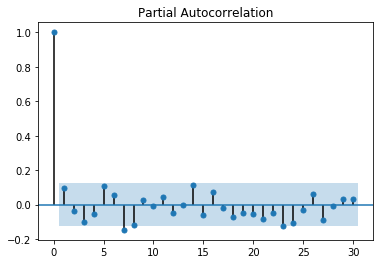

In [48]:
#Creating the ACF and PACF plots of the differenced gold series

sm.graphics.tsa.plot_acf(differenced_gold_clean.Differenced_gold, lags=30);
sm.graphics.tsa.plot_pacf(differenced_gold_clean.Differenced_gold, lags=30);

In [49]:
#Task 5

#Reading in the necessary dataset
data_sim = pd.read_csv("data.sim.csv", header=None)

#Renaming columns
data_sim.columns = ['Sim','Time']

data_sim.head()

,Sim,Time
0,0.000000,1
1,-0.398143,2
2,-2.317668,3
3,-1.094310,4
4,-1.195734,5


In [50]:
#Setting the index of the dataframe to the Time column
data_sim.set_index('Time', inplace=True)
#There is no need to convert the column to ts object as in R - setting to index would suffice

[Text(0, 0.5, 'Simulated series'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Simulated series')]

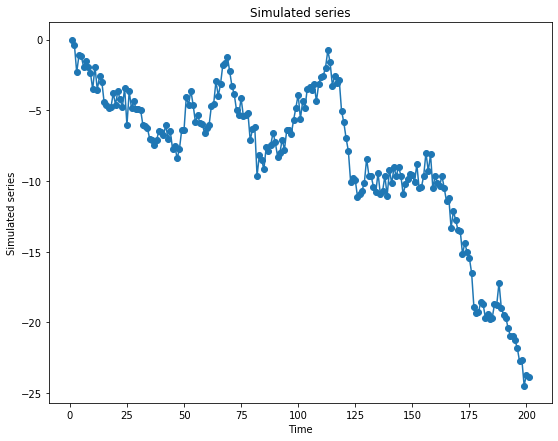

In [51]:
#Plotting the time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(data_sim.index.values, data_sim['Sim'],'-o')
ax.set(xlabel="Time",ylabel="Simulated series",title="Simulated series")

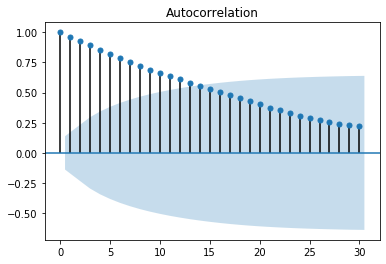

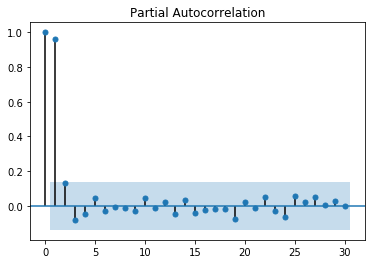

In [52]:
#Creating the ACF and PACF plots of the simulated series

sm.graphics.tsa.plot_acf(data_sim.Sim, lags=30);
sm.graphics.tsa.plot_pacf(data_sim.Sim, lags=30);

In [53]:
#Adding 1 to the minimum value of the series to make it all positive

data_sim['Sim'] = data_sim['Sim']+abs(data_sim['Sim'].min())+1 

data_sim.head()

,Sim
Time,
1,25.458687
2,25.060544
3,23.141019
4,24.364378
5,24.262953


In [54]:
#Transforming the series

transformed_sim, lambda_= stats.boxcox(data_sim['Sim']) #Automatically transforms the data with the best lambda value

print("lambda=",lambda_)

transformed_sim = pd.DataFrame(transformed_sim)

#Setting the index of the data frame
transformed_sim.index=data_sim.index

transformed_sim.columns = ['Transformed_Sim']

transformed_sim

#The lambda value here is different from the lambda value found in R

lambda= 1.8894030827481818


,Transformed_Sim
Time,
1,239.280169
2,232.243594
3,199.707513
4,220.177254
5,218.444558
...,...
197,2.939268
198,3.261932
199,0.000000


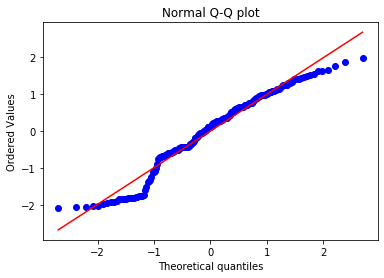

In [55]:
#Checking normality of log transformed larain series using QQ plot

z = (transformed_sim.Transformed_Sim-np.mean(transformed_sim.Transformed_Sim))/np.std(transformed_sim.Transformed_Sim)

scp.probplot(z, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [56]:
#Shapiro-Wilk's test for normality

scp.shapiro(transformed_sim.Transformed_Sim)

(0.9602200984954834, 1.9922179490095004e-05)

In [57]:
#Taking the first difference of the transformed series

differenced_sim = pd.DataFrame(Series.diff(transformed_sim.Transformed_Sim, 1))

differenced_sim.columns = ['Differenced_Sim']

differenced_sim.head()

,Differenced_Sim
Time,
1,NaN
2,-7.036575
3,-32.536082
4,20.469741
5,-1.732695


[Text(0, 0.5, 'Differenced Simulated series'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Differenced Simulated series')]

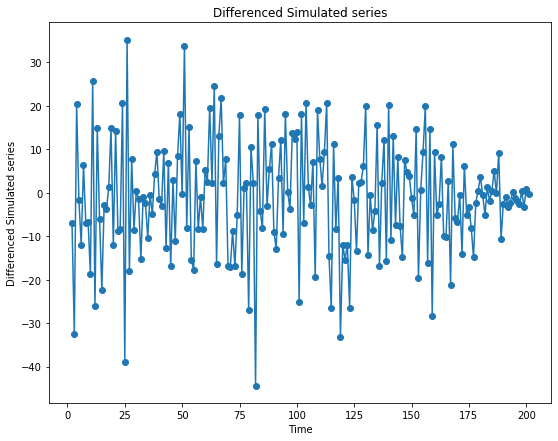

In [58]:
#Plotting the differenced time series data

fig,ax=plt.subplots(figsize=(9,7))
ax.plot(differenced_sim.index.values, differenced_sim['Differenced_Sim'],'-o')
ax.set(xlabel="Time",ylabel="Differenced Simulated series",title="Differenced Simulated series")

In [59]:
#Removing the first NA value for use with ACF and PACF plots
differenced_sim_clean = differenced_sim.iloc[1:]

differenced_sim_clean.head()

,Differenced_Sim
Time,
2,-7.036575
3,-32.536082
4,20.469741
5,-1.732695
6,-11.955670


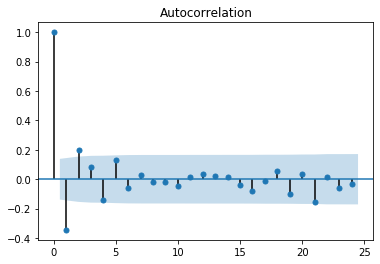

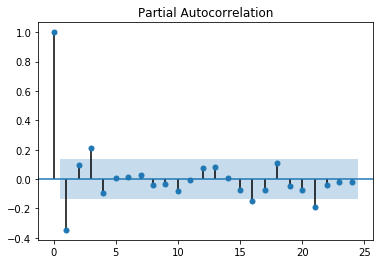

In [60]:
#Creating the ACF and PACF plots of the differenced simulated series
sm.graphics.tsa.plot_acf(differenced_sim_clean.Differenced_Sim);
sm.graphics.tsa.plot_pacf(differenced_sim_clean.Differenced_Sim);